<a href="https://colab.research.google.com/github/hamza2803/Airlift_Case_Study/blob/main/Airlift_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib --upgrade

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Airlift/data.csv')

In [ ]:
df.head()

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536


# Explanatory Data Analysis

In [ ]:
#check null values in each column
df.isna().sum()

warehouse       0
date            0
total_orders    0
dtype: int64

In [ ]:
#finding total orders from each warehouse during the given period
df['warehouse'].value_counts()

EW1    90
EW2    55
Name: warehouse, dtype: int64

In [ ]:
#Creating a column of day names
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
# df

In [ ]:
#Creating a column of month names
df['date'] = pd.to_datetime(df['date'])
df['month_of_year'] = df['date'].dt.month_name()
# df

In [ ]:
#Creating a column of week number
df['date'] = pd.to_datetime(df['date'])
df['week_number'] = df['date'].dt.week
# df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Dividing dataframe into two.
df_EW1 = df[df['warehouse'] == 'EW1']
df_EW2 = df[df['warehouse'] == 'EW2']

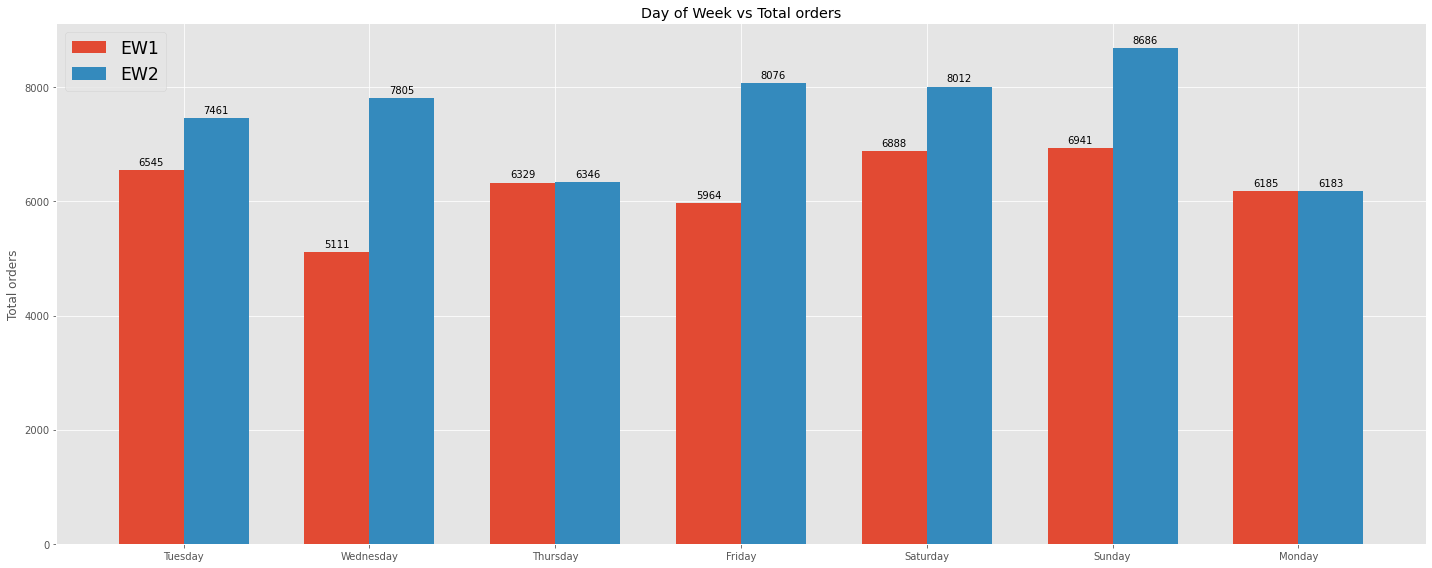

In [ ]:
labels = np.array(pd.unique(df_EW1['day_of_week'])).tolist()
EW1_orders = np.array(df_EW1.groupby('day_of_week', sort=False).total_orders.sum()).tolist()
EW2_orders = np.array(df_EW2.groupby('day_of_week', sort=False).total_orders.sum()).tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, EW1_orders, width, label='EW1')
rects2 = ax.bar(x + width/2, EW2_orders, width, label='EW2')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total orders')
ax.set_title('Day of Week vs Total orders')
ax.set_xticks(x, labels)
ax.legend(loc='upper left', fontsize='xx-large')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
df_EW1

,warehouse,date,total_orders,day_of_week,month_of_year,week_number
0,EW1,2021-08-10,455,Tuesday,August,32
1,EW1,2021-08-11,553,Wednesday,August,32
2,EW1,2021-08-12,569,Thursday,August,32
3,EW1,2021-08-13,426,Friday,August,32
4,EW1,2021-08-14,536,Saturday,August,32
...,...,...,...,...,...,...
85,EW1,2021-11-04,386,Thursday,November,44
86,EW1,2021-11-05,375,Friday,November,44
87,EW1,2021-11-06,441,Saturday,November,44
88,EW1,2021-11-07,421,Sunday,November,44


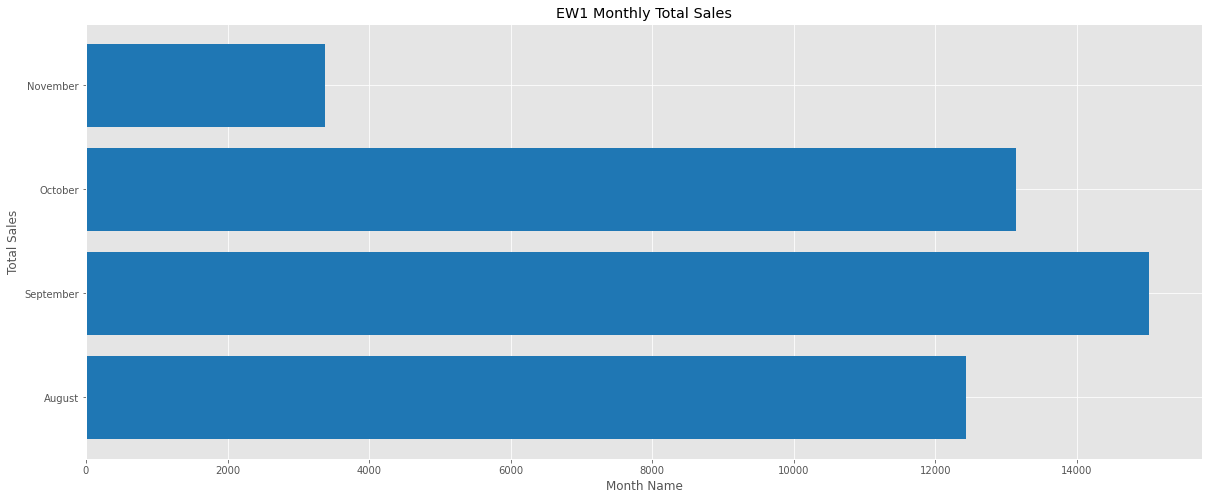

In [ ]:
month_labels = np.array(pd.unique(df_EW1['month_of_year'])).tolist()
EW1_orders = np.array(df_EW1.groupby('month_of_year',sort=False).total_orders.sum())

month_name = month_labels
total_sale = EW1_orders

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.style.use('ggplot')

plt.barh(month_name, total_sale, color='#1f77b4')
plt.title('EW1 Monthly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month Name')

plt.show()

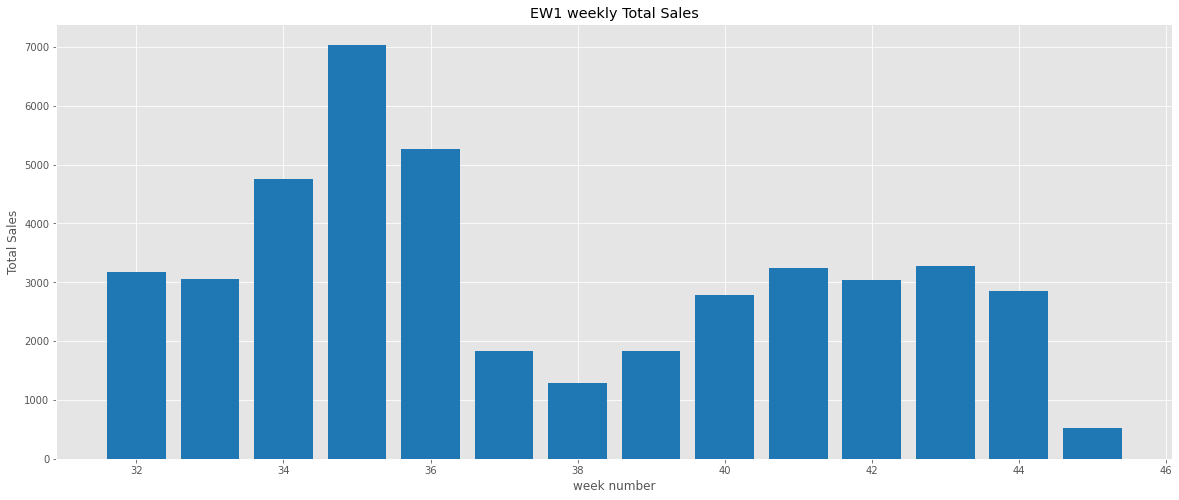

In [ ]:
week_labels = np.array(pd.unique(df_EW1['week_number'])).tolist()

EW1_orders = np.array(df_EW1.groupby('week_number',sort=False).total_orders.sum()).tolist()

month_name = week_labels
total_sale = EW1_orders

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.style.use('ggplot')

plt.bar(month_name, total_sale, color='#1f77b4')
plt.title('EW1 weekly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('week number')

plt.show()

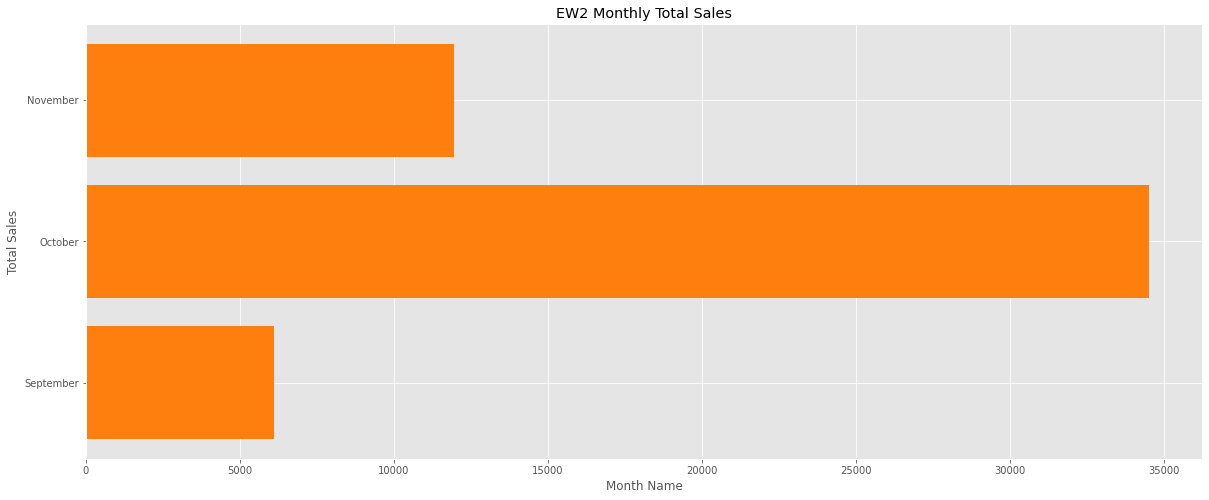

In [ ]:
month_labels = np.array(pd.unique(df_EW2['month_of_year'])).tolist()

EW2_orders = np.array(df_EW2.groupby('month_of_year',sort=False).total_orders.sum()).tolist()
month_name = month_labels
total_sale = EW2_orders

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.style.use('ggplot')

plt.barh(month_name, total_sale, color='#ff7f0e')
plt.title('EW2 Monthly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month Name')

plt.show()

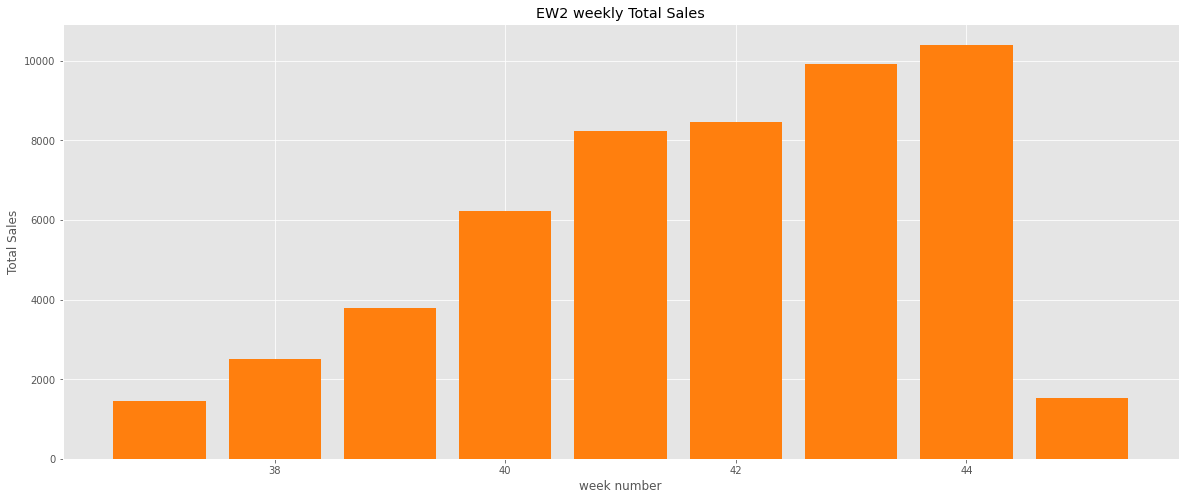

In [ ]:
week_labels = np.array(pd.unique(df_EW2['week_number'])).tolist()

EW2_orders = np.array(df_EW2.groupby('week_number',sort=False).total_orders.sum()).tolist()

month_name = week_labels
total_sale = EW2_orders

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.style.use('ggplot')

plt.bar(month_name, total_sale, color='#ff7f0e')
plt.title('EW2 weekly Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('week number')

plt.show()

## Visualization of Each Month Sales of EW1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


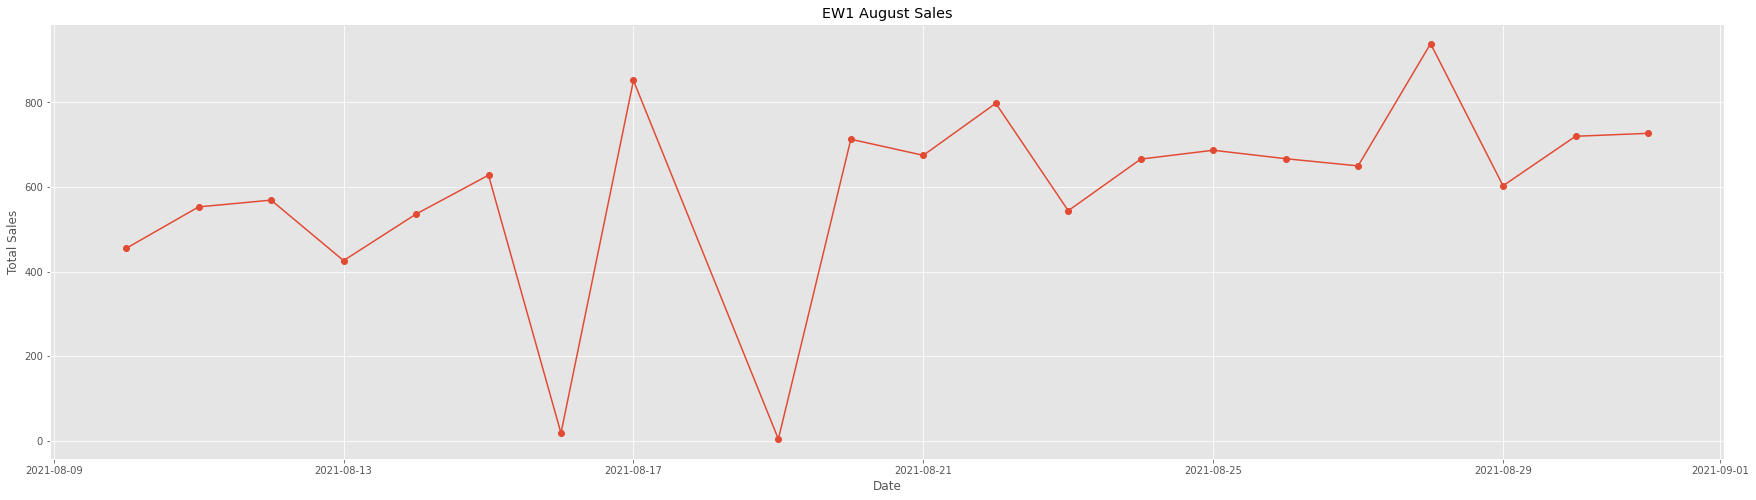

In [ ]:
df_august_EW1 = df_EW1[df_EW1['month_of_year'] == 'August']

df_august_EW1['date']
df_august_EW1['date'] = df_august_EW1['date'].astype("datetime64")

# Setting the Date as index

df_august_EW1 = df_august_EW1.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_august_EW1["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW1 August Sales")

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


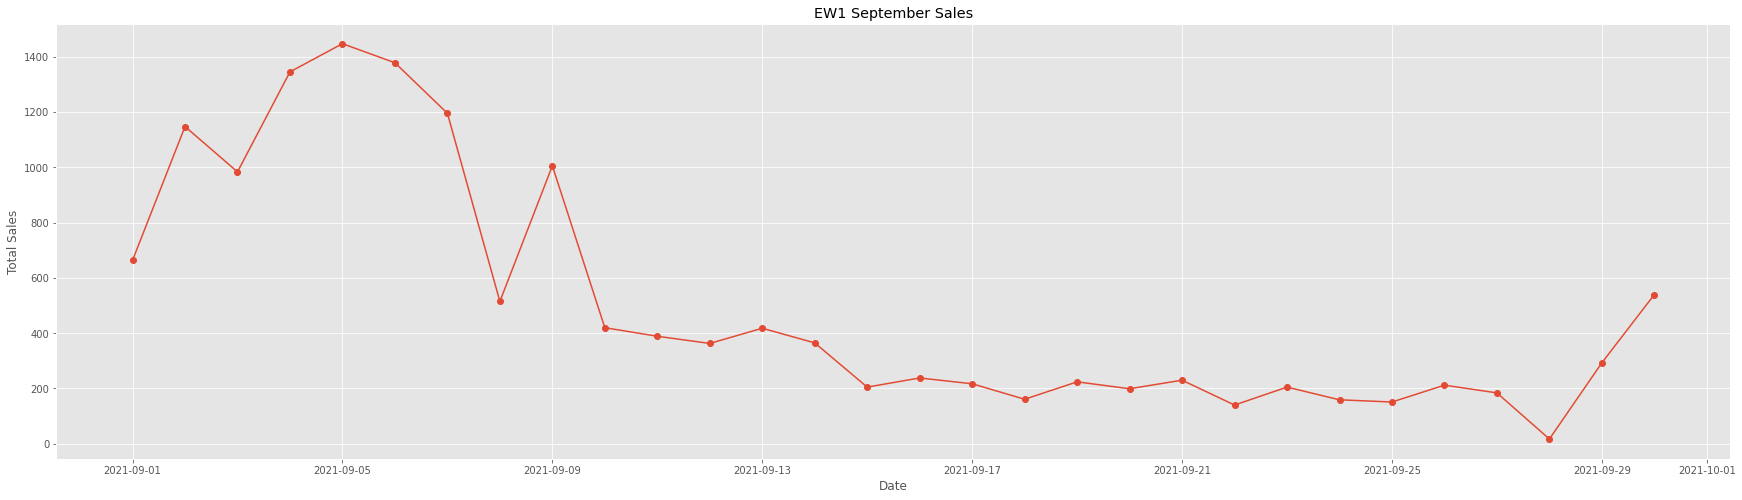

In [ ]:
df_september_EW1 = df_EW1[df_EW1['month_of_year'] == 'September']

df_september_EW1['date']
df_september_EW1['date'] = df_september_EW1['date'].astype("datetime64")

# Setting the Date as index

df_september_EW1 = df_september_EW1.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_september_EW1["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW1 September Sales")

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


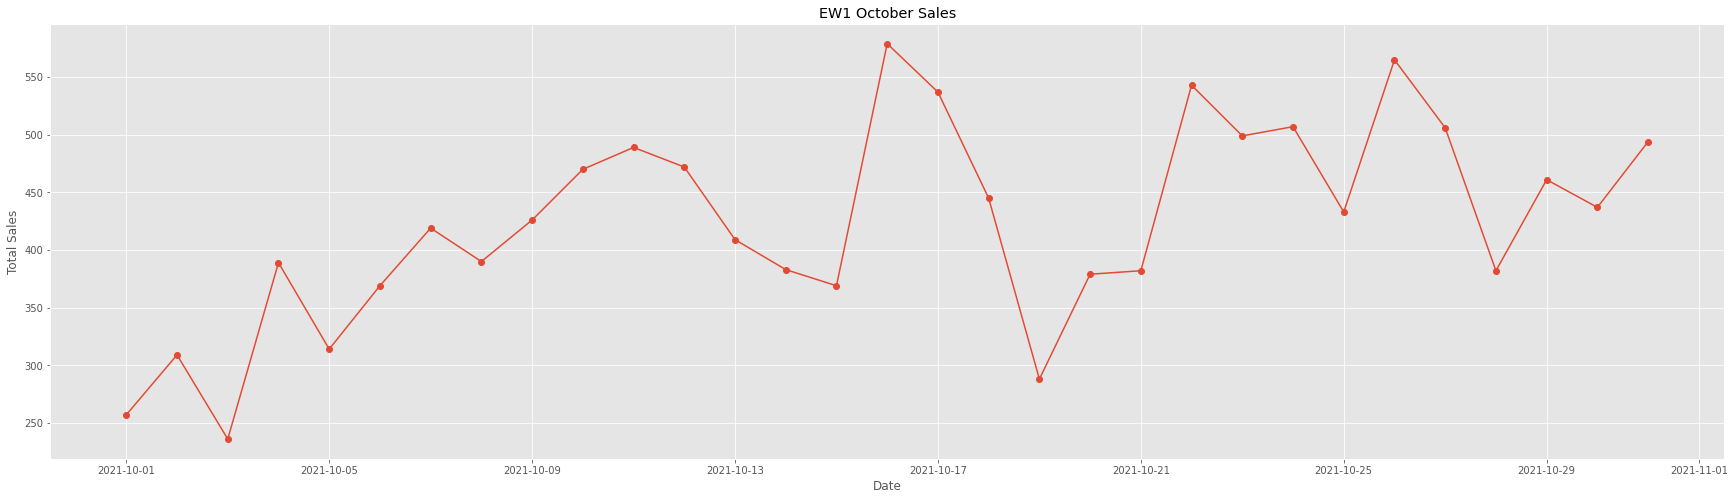

In [ ]:
df_october_EW1 = df_EW1[df_EW1['month_of_year'] == 'October']

df_october_EW1['date']
df_october_EW1['date'] = df_october_EW1['date'].astype("datetime64")

# Setting the Date as index

df_october_EW1 = df_october_EW1.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_october_EW1["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW1 October Sales")

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


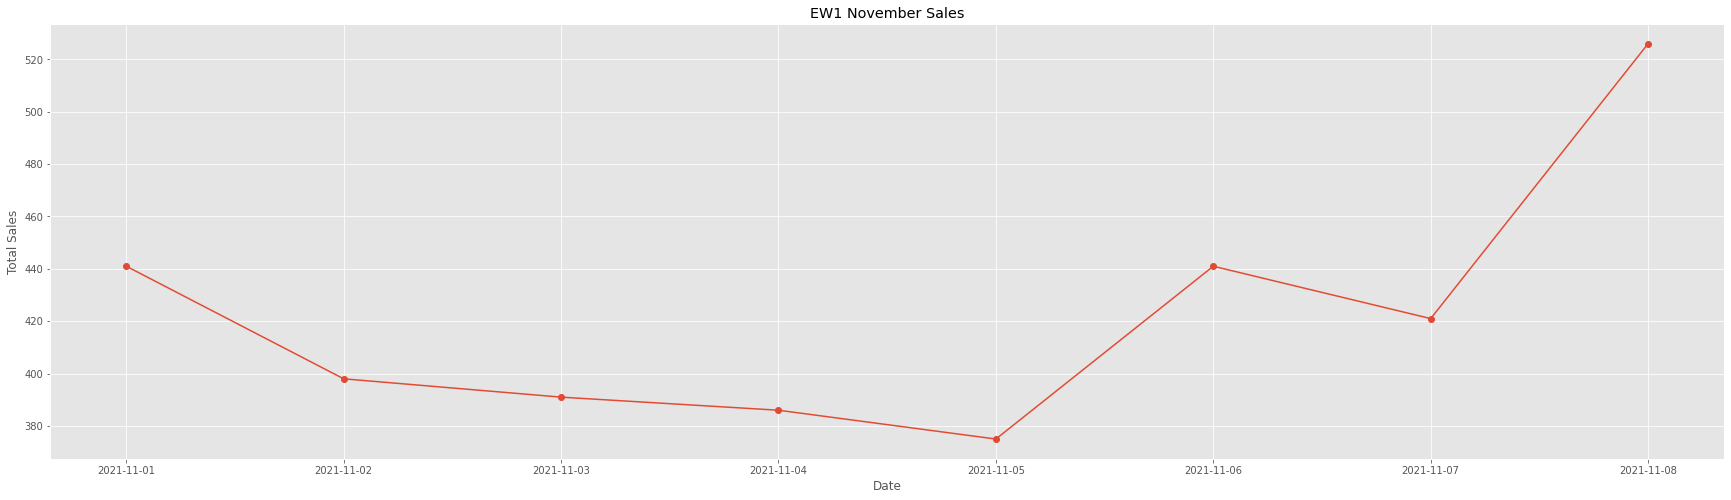

In [ ]:
df_november_EW1 = df_EW1[df_EW1['month_of_year'] == 'November']

df_november_EW1['date']
df_november_EW1['date'] = df_november_EW1['date'].astype("datetime64")

# Setting the Date as index

df_november_EW1 = df_november_EW1.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_november_EW1["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW1 November Sales")

# Display

plt.show()

## Visualization of Each Month Sales for EW2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


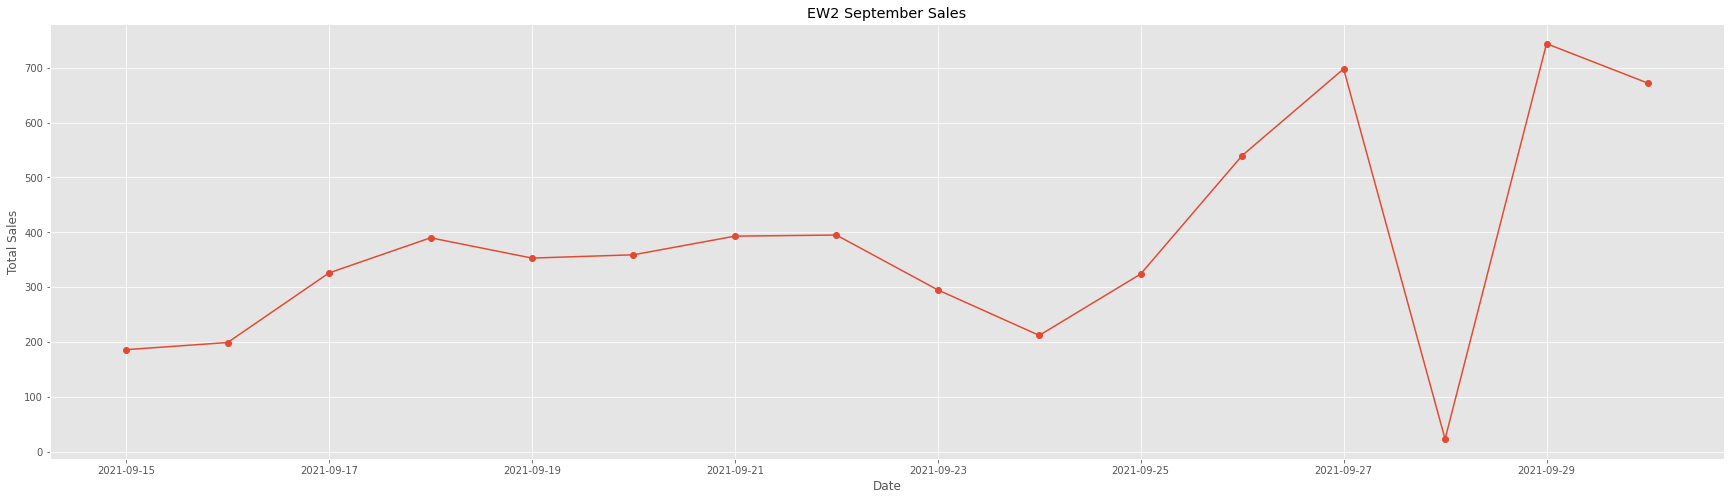

In [ ]:
df_september_EW2 = df_EW2[df_EW2['month_of_year'] == 'September']

df_september_EW2['date']
df_september_EW2['date'] = df_september_EW2['date'].astype("datetime64")

# Setting the Date as index

df_september_EW2 = df_september_EW2.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_september_EW2["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW2 September Sales")

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


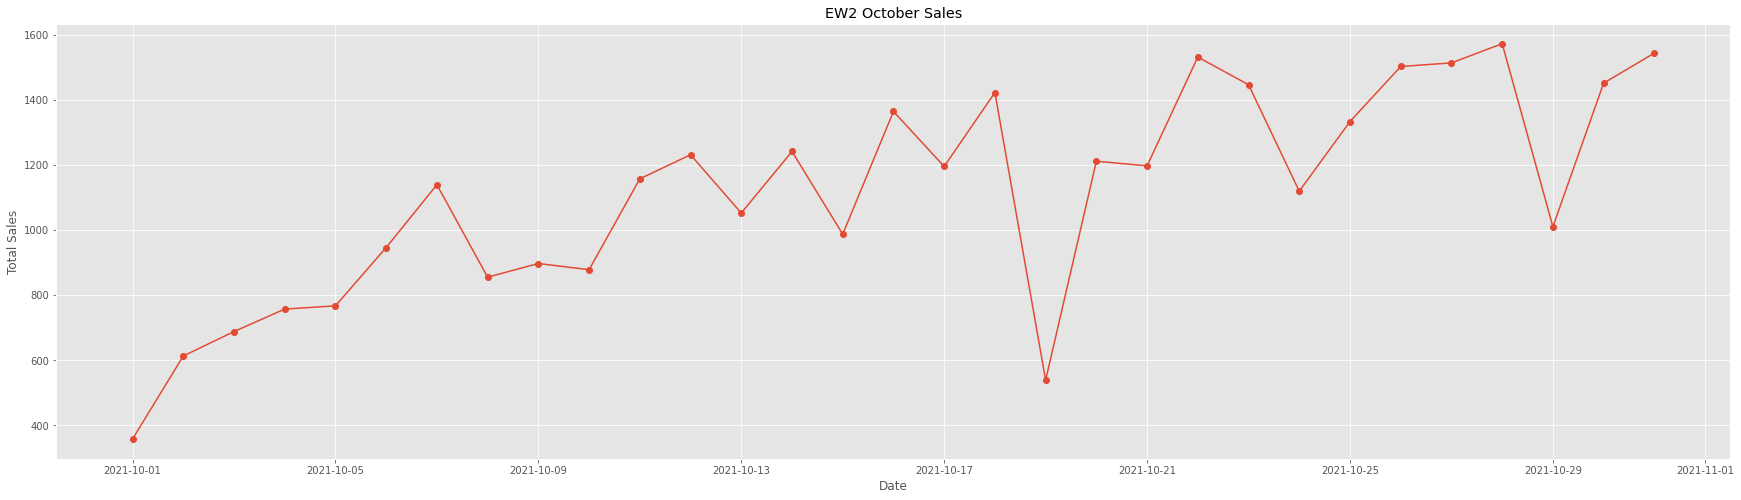

In [ ]:
df_october_EW2 = df_EW2[df_EW2['month_of_year'] == 'October']

df_october_EW2['date']
df_october_EW2['date'] = df_october_EW2['date'].astype("datetime64")

# Setting the Date as index

df_october_EW2 = df_october_EW2.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_october_EW2["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW2 October Sales")

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


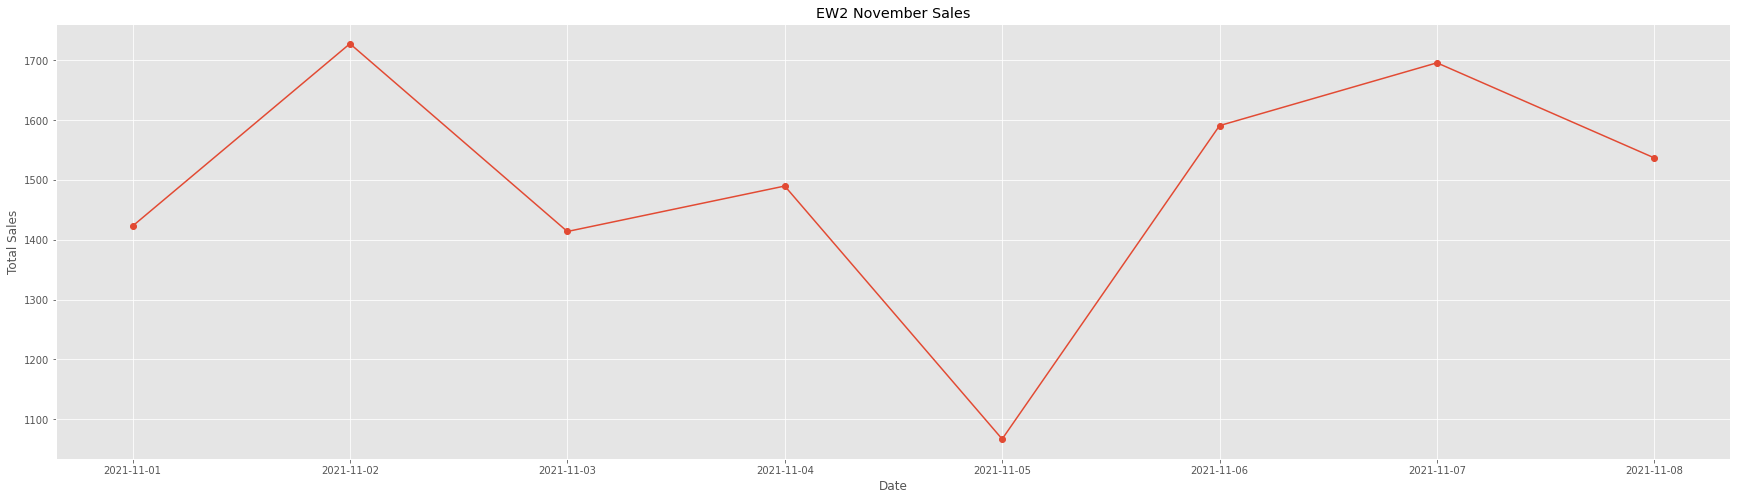

In [ ]:
df_november_EW2 = df_EW2[df_EW2['month_of_year'] == 'November']

df_november_EW2['date']
df_november_EW2['date'] = df_november_EW2['date'].astype("datetime64")

# Setting the Date as index

df_november_EW2 = df_november_EW2.set_index("date")

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(8)

plt.plot(df_november_EW2["total_orders"], marker='o')

# Labelling
# plt.xticks(df_august_EW1.index.values)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("EW2 November Sales")

# Display

plt.show()

# General

In [ ]:
# Convert date into Datetime
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.head()

,warehouse,total_orders,day_of_week,month_of_year,week_number
date,,,,,
2021-08-10,EW1,455,Tuesday,August,32
2021-08-11,EW1,553,Wednesday,August,32
2021-08-12,EW1,569,Thursday,August,32
2021-08-13,EW1,426,Friday,August,32
2021-08-14,EW1,536,Saturday,August,32


# Forecasting EW1 Sales

In [ ]:
df_EW1 = df[df['warehouse'] == 'EW1']
df_EW1.drop(['warehouse'], axis=1)

,total_orders,day_of_week,month_of_year,week_number
date,,,,
2021-08-10,455,Tuesday,August,32
2021-08-11,553,Wednesday,August,32
2021-08-12,569,Thursday,August,32
2021-08-13,426,Friday,August,32
2021-08-14,536,Saturday,August,32
...,...,...,...,...
2021-11-04,386,Thursday,November,44
2021-11-05,375,Friday,November,44
2021-11-06,441,Saturday,November,44


In [ ]:
df_EW1.describe()

,total_orders,week_number
count,90.000000,90.000000
mean,488.477778,38.200000
std,281.572480,3.760229
min,4.000000,32.000000
25%,363.500000,35.000000
50%,435.000000,38.000000
75%,568.000000,41.000000
max,1448.000000,45.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='date'>

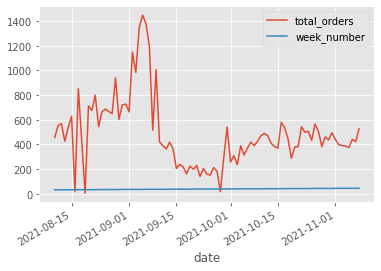

In [ ]:
df_EW1.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_EW1['total_orders'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(orders):
    result=adfuller(orders)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_EW1['total_orders'])

ADF Test Statistic : -2.0679368385438406
p-value : 0.2576012144502858
#Lags Used : 1
Number of Observations Used : 88
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df_EW1['Sales First Difference'] = df_EW1['total_orders'] - df_EW1['total_orders'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df_EW1.head(14)

,warehouse,total_orders,day_of_week,month_of_year,week_number,Sales First Difference
date,,,,,,
2021-08-10,EW1,455,Tuesday,August,32,NaN
2021-08-11,EW1,553,Wednesday,August,32,98.0
2021-08-12,EW1,569,Thursday,August,32,16.0
2021-08-13,EW1,426,Friday,August,32,-143.0
2021-08-14,EW1,536,Saturday,August,32,110.0
2021-08-15,EW1,628,Sunday,August,32,92.0
2021-08-16,EW1,18,Monday,August,33,-610.0
2021-08-17,EW1,852,Tuesday,August,33,834.0
2021-08-19,EW1,4,Thursday,August,33,-848.0


In [ ]:
## Again test dickey fuller test
adfuller_test(df_EW1['Sales First Difference'].dropna())

ADF Test Statistic : -18.902748837025765
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 88
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

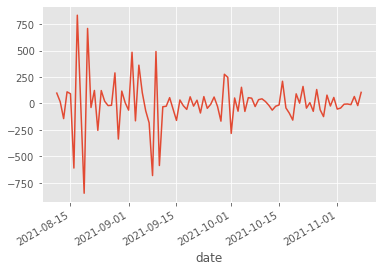

In [ ]:
df_EW1['Sales First Difference'].plot()

## Auto Regressive Model


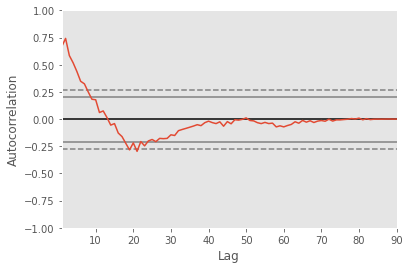

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_EW1['total_orders'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


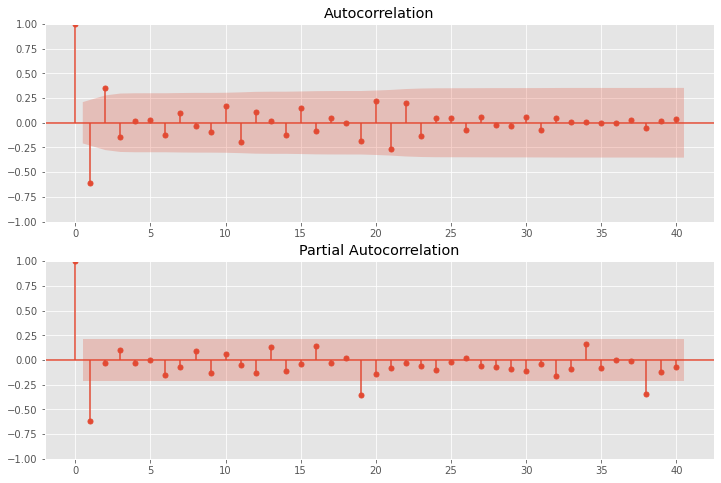

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df_EW1['Sales First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df_EW1['Sales First Difference'].iloc[2:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_EW1.index[-1]+ DateOffset(days=x) for x in range(0,8)]

In [ ]:
df_EW1.index = pd.DatetimeIndex(df_EW1.index).to_period('D')

In [ ]:
model=ARIMA(df_EW1['total_orders'],order=(3,1,2))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_orders   No. Observations:                   90
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -587.697
Date:                Wed, 06 Apr 2022   AIC                           1187.395
Time:                        16:40:16   BIC                           1202.326
Sample:                    08-10-2021   HQIC                          1193.413
                         - 11-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3057      0.214     -1.428      0.153      -0.725       0.114
ar.L2         -0.7283      0.223     -3.258      0.001      -1.166      -0.290
ar.L3         -0.5021      0.144     -3.493      0.000      -0.784      -0.220
ma.L1         -0.3360      0.196     -1.712      0.087      -0.721       0.049
ma.L2          0.9884      0.595      1.661      0.097      -0.178       2.155
sigma2      3.074e+04   1.54e+04      1.991      0.047     472.762     6.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                77.54
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

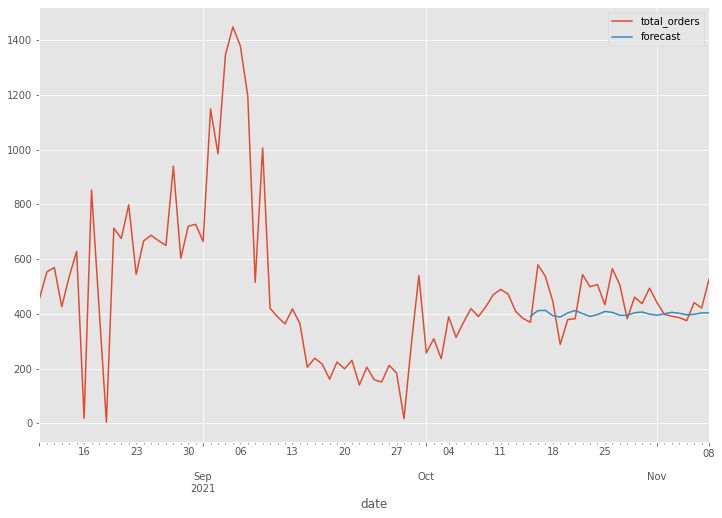

In [ ]:
df_EW1['forecast']=model_fit.predict(start=65,end=89,dynamic=True)
df_EW1[['total_orders','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_EW1['total_orders'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

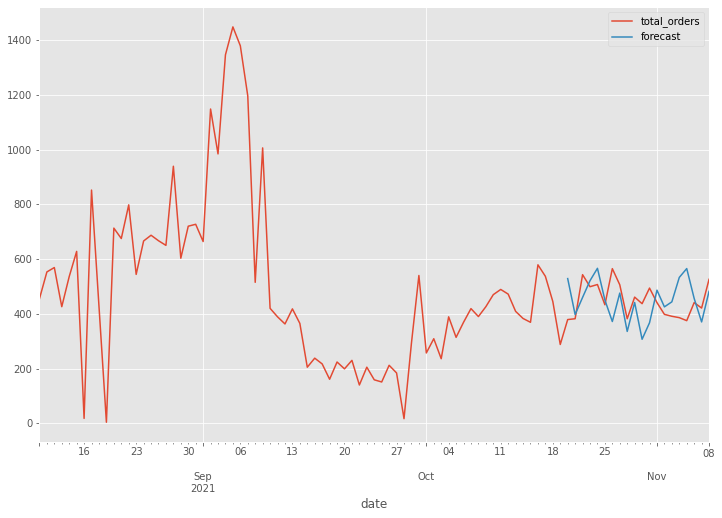

In [ ]:
df_EW1['forecast']=results.predict(start=70,end=89,dynamic=True)
df_EW1[['total_orders','forecast']].plot(figsize=(12,8))

In [ ]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df_EW1.index[-1]+ DateOffset(days=x) for x in range(0,8)]
future_dates = pd.DatetimeIndex(future_dates).to_period('D')

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_EW1.columns)

In [ ]:
future_datest_df

,warehouse,total_orders,day_of_week,month_of_year,week_number,Sales First Difference,forecast
2021-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df_EW1,future_datest_df])
future_df = future_df.drop(['warehouse'], axis=1)
future_df

,total_orders,day_of_week,month_of_year,week_number,Sales First Difference,forecast
2021-08-10,455,Tuesday,August,32,NaN,NaN
2021-08-11,553,Wednesday,August,32,98.0,NaN
2021-08-12,569,Thursday,August,32,16.0,NaN
2021-08-13,426,Friday,August,32,-143.0,NaN
2021-08-14,536,Saturday,August,32,110.0,NaN
...,...,...,...,...,...,...
2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

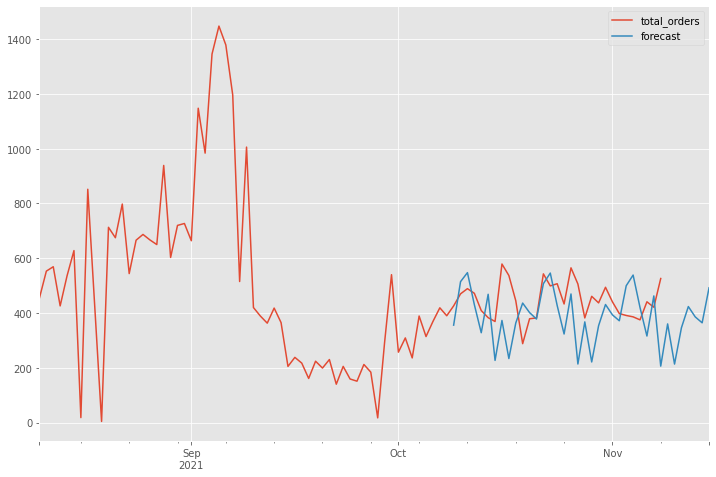

In [ ]:
future_df['forecast'] = results.predict(start = 60, end = 97, dynamic= True)
future_df[['total_orders', 'forecast']].plot(figsize=(12, 8))

**Daily orders for next week (9-15) November**

In [ ]:
future_df['forecast'].tail(7)

2021-11-09    360.167279
2021-11-10    213.505262
2021-11-11    346.160092
2021-11-12    423.589345
2021-11-13    385.787288
2021-11-14    364.163062
2021-11-15    492.089743
Freq: D, Name: forecast, dtype: float64

**Forecast accuracy of the model**

In [ ]:
forecast_errors = (future_df['total_orders'] - future_df['forecast']).dropna()
forecast_errors = forecast_errors.values.tolist()
forecast_errors_squared = [i ** 2 for i in forecast_errors]

In [ ]:
from statistics import mean
from math import sqrt
mean_squared_error = mean(forecast_errors_squared)
rmse = sqrt(mean_squared_error)
rmse
# mse = mean_squared_error()

133.75695540277383

# Forecasting EW2 Sales

In [ ]:
df_EW2 = df[df['warehouse'] == 'EW2']
df_EW2.drop(['warehouse'], axis=1)

,total_orders,day_of_week,month_of_year,week_number
date,,,,
2021-09-15,186,Wednesday,September,37
2021-09-16,199,Thursday,September,37
2021-09-17,326,Friday,September,37
2021-09-18,390,Saturday,September,37
2021-09-19,353,Sunday,September,37
2021-09-20,359,Monday,September,38
2021-09-21,393,Tuesday,September,38
2021-09-22,395,Wednesday,September,38
2021-09-23,295,Thursday,September,38


In [ ]:
df_EW2.describe()

,total_orders,week_number
count,55.000000,55.000000
mean,955.800000,40.709091
std,479.406902,2.306775
min,23.000000,37.000000
25%,539.500000,39.000000
50%,1010.000000,41.000000
75%,1418.000000,43.000000
max,1728.000000,45.000000


## Visualize the Data

<AxesSubplot:xlabel='date'>

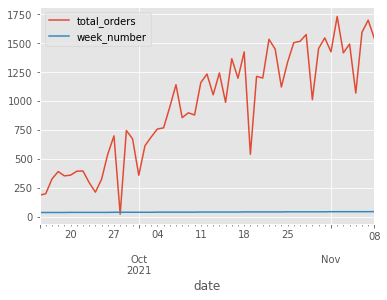

In [ ]:
df_EW2.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_EW2['total_orders'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(orders):
    result=adfuller(orders)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_EW2['total_orders'])

ADF Test Statistic : -0.9250215887215285
p-value : 0.7796208214580402
#Lags Used : 4
Number of Observations Used : 50
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df_EW2['Sales First Difference'] = df_EW2['total_orders'] - df_EW2['total_orders'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df_EW2.head(14)

,warehouse,total_orders,day_of_week,month_of_year,week_number,Sales First Difference
date,,,,,,
2021-09-15,EW2,186,Wednesday,September,37,NaN
2021-09-16,EW2,199,Thursday,September,37,13.0
2021-09-17,EW2,326,Friday,September,37,127.0
2021-09-18,EW2,390,Saturday,September,37,64.0
2021-09-19,EW2,353,Sunday,September,37,-37.0
2021-09-20,EW2,359,Monday,September,38,6.0
2021-09-21,EW2,393,Tuesday,September,38,34.0
2021-09-22,EW2,395,Wednesday,September,38,2.0
2021-09-23,EW2,295,Thursday,September,38,-100.0


In [ ]:
## Again test dickey fuller test
adfuller_test(df_EW2['Sales First Difference'].dropna())

ADF Test Statistic : -7.482735056428564
p-value : 4.725369154449435e-11
#Lags Used : 3
Number of Observations Used : 50
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

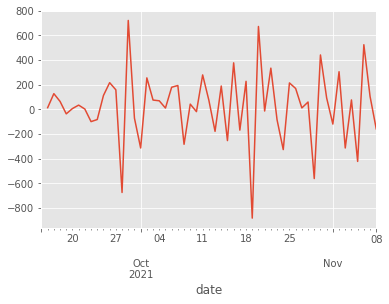

In [ ]:
df_EW2['Sales First Difference'].plot()

## Auto Regressive Model

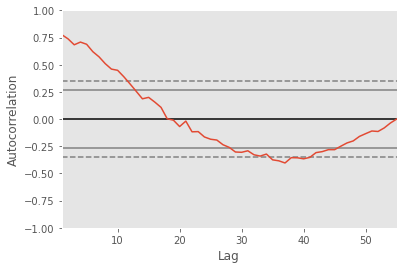

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_EW2['total_orders'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


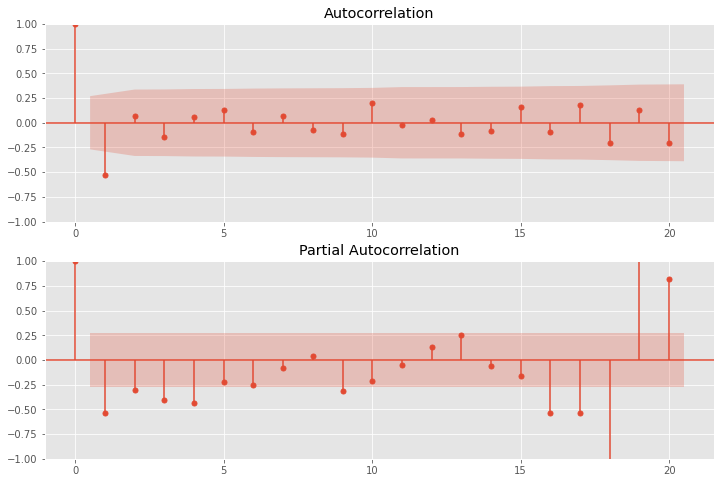

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df_EW2['Sales First Difference'].iloc[2:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df_EW2['Sales First Difference'].iloc[2:],lags=20,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates2=[df_EW2.index[-1]+ DateOffset(days=x) for x in range(0,8)]

In [ ]:
df_EW2.index = pd.DatetimeIndex(df_EW2.index).to_period('D')

In [ ]:
model=ARIMA(df_EW2['total_orders'],order=(1,1,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_orders   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -370.711
Date:                Wed, 06 Apr 2022   AIC                            747.423
Time:                        16:40:24   BIC                            753.389
Sample:                    09-15-2021   HQIC                           749.724
                         - 11-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1441      0.225     -0.640      0.522      -0.585       0.297
ma.L1         -0.6184      0.183     -3.377      0.001      -0.977      -0.259
sigma2      5.311e+04   1.09e+04      4.859      0.000    3.17e+04    7.45e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                27.42
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -1.33
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

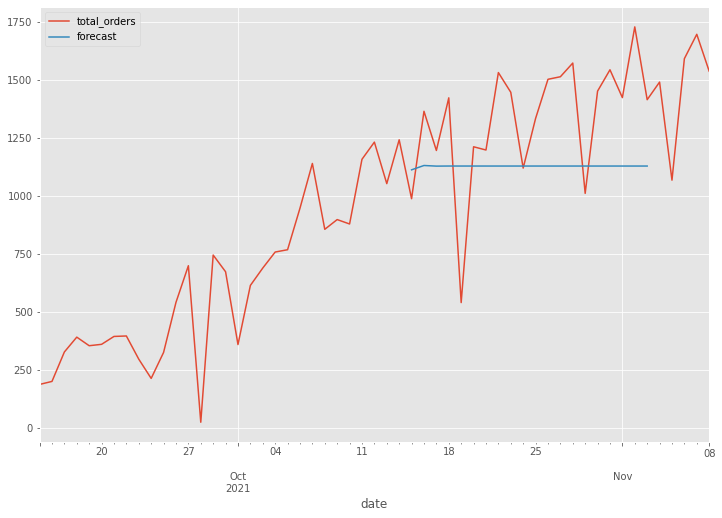

In [ ]:
df_EW2['forecast']=model_fit.predict(start=30,end=49,dynamic=True)
df_EW2[['total_orders','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_EW2['total_orders'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

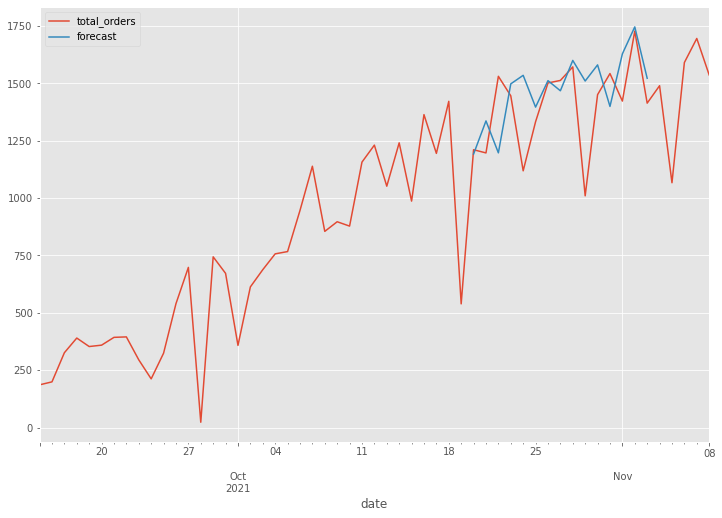

In [ ]:
df_EW2['forecast']=results.predict(start=35,end=49,dynamic=True)
df_EW2[['total_orders','forecast']].plot(figsize=(12,8))

In [ ]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df_EW1.index[-1]+ DateOffset(days=x) for x in range(0,8)]
future_dates2 = pd.DatetimeIndex(future_dates2).to_period('D')

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates2[1:],columns=df_EW2.columns)

In [ ]:
future_datest_df

,warehouse,total_orders,day_of_week,month_of_year,week_number,Sales First Difference,forecast
2021-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df_EW2,future_datest_df])
future_df = future_df.drop(['warehouse'], axis=1)
future_df

,total_orders,day_of_week,month_of_year,week_number,Sales First Difference,forecast
2021-09-15,186,Wednesday,September,37,NaN,NaN
2021-09-16,199,Thursday,September,37,13.0,NaN
2021-09-17,326,Friday,September,37,127.0,NaN
2021-09-18,390,Saturday,September,37,64.0,NaN
2021-09-19,353,Sunday,September,37,-37.0,NaN
...,...,...,...,...,...,...
2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

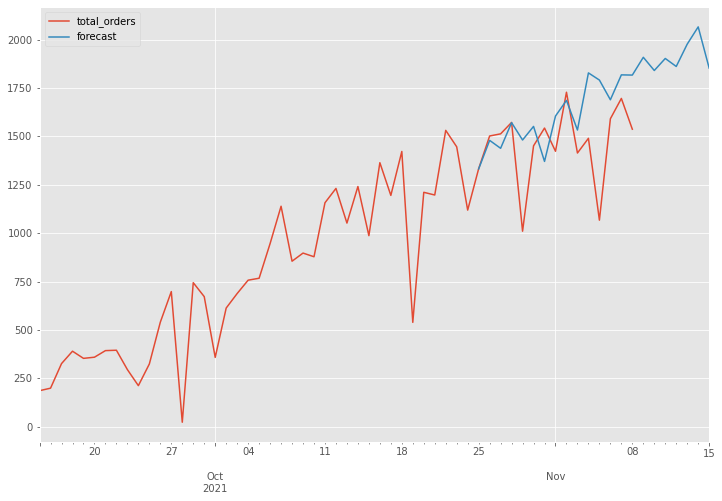

In [ ]:
future_df['forecast'] = results.predict(start = 40, end = 62, dynamic= True)
future_df[['total_orders', 'forecast']].plot(figsize=(12, 8))

**Next Week Daily Sales for EW2 (9-15) November**

In [ ]:
future_df['forecast'].tail(7)

2021-11-09    1908.546595
2021-11-10    1840.324569
2021-11-11    1902.490329
2021-11-12    1861.154736
2021-11-13    1976.604276
2021-11-14    2065.668548
2021-11-15    1852.565952
Freq: D, Name: forecast, dtype: float64

**Forecast accuracy of the model**

In [ ]:
forecast_errors = (future_df['total_orders'] - future_df['forecast']).dropna()
forecast_errors = forecast_errors.values.tolist()
forecast_errors_squared = [i ** 2 for i in forecast_errors]

In [ ]:
from statistics import mean
from math import sqrt
mean_squared_error = mean(forecast_errors_squared)
rmse = sqrt(mean_squared_error)
rmse
# mse = mean_squared_error()

265.56382883410873